Base Model ABM with more economic sectors and agents

Visión general del modelo (ABM macro “Keynesiano” simplificado)

Este ABM describe una economía discreta en el tiempo $𝑡=1,…,𝑇$ con:

- Hogares $ℎ=1,…,𝑁_𝐻$ : ofrecen trabajo, reciben salarios/transferencias/intereses, pagan impuestos y consumen.

- Empresas $𝑖=1,…,𝑁_𝐹$ : producen con trabajo, fijan precios con markup, contratan/despiden, venden con demanda endógena, pueden endeudarse (crédito de capital de trabajo) y quebrar.

- Gobierno: cobra impuestos (salarios y utilidades), paga gasto público y seguro de desempleo, emite deuda para cubrir déficit.

- Banco Central: fija la tasa de política vía regla tipo Taylor con inflación y brecha de producto.

- Banco (reducido): intermedia depósitos (ahorro de hogares) y crédito (préstamos a firmas y deuda pública de forma simplificada) mediante tasas ligadas a la política monetaria.

Este modelo genera endógenamente:

Desempleo, inflación (por ajuste de precios), ciclos (por demanda + inventarios + contratación), déficit/deuda pública, y distribuciones de riqueza.

---

# 1) Timing (secuencia dentro de cada período)

En cada período $t$:

1. **Banco Central** fija la tasa de política $i_t$ con inflación y brecha de producto.
2. Se determinan tasas financieras: depósitos $r^d_t$ y préstamos $r^\ell_t$.
3. **Gobierno** fija gasto $G_t$ (regla fiscal) y paga seguro de desempleo.
4. **Empresas** forman expectativas de demanda, deciden empleo deseado, despiden/abren vacantes.
5. **Matching laboral**: desempleados aplican y firmas contratan.
6. **Producción** y acumulación de inventarios.
7. **Fijación de precios** (costos + presión de inventarios).
8. **Hogares** reciben ingresos, pagan impuestos y deciden consumo.
9. **Demanda agregada** $C_t + G_t$ se asigna entre firmas (elección discreta por precios).
10. **Ventas, ganancias, impuestos, intereses, crédito** y **quiebras**.
11. Se actualizan **cuentas fiscales** (déficit/deuda) y se computan agregados (CPI, inflación, desempleo, PIB nominal/real).

---

# 2) Supuestos y ecuaciones

## 2.1 Hogares: ingreso, impuestos, consumo y riqueza

**Ingreso bruto del hogar $h$:**

$Y_{h,t}=
\underbrace{w_{h,t}\cdot \mathbb{1}\{empleado\}}_{\text{salario}}
+
\underbrace{b_u\cdot \mathbb{1}\{desempleado\}}_{\text{seguro desempleo}}
+
\underbrace{r^d_t \, A_{h,t}}_{\text{interés depósitos}}$

**Impuesto a salarios e intereses (simplificado):**

$T_{h,t}=\tau_w \big(w_{h,t}\mathbb{1}\{empleado\}\big) + \tau_k \big(r^d_t A_{h,t}\big)$

**Ingreso disponible:**

$Y^d_{h,t}=Y_{h,t}-T_{h,t}$

**Regla de consumo (MPC sobre ingreso y riqueza):**

$C_{h,t}=\min\Big\{A_{h,t}+Y^d_{h,t},\; c_y Y^d_{h,t} + c_a A_{h,t}\Big\}, \quad C_{h,t}\ge 0$

**Evolución de riqueza (depósitos):**

$A_{h,t+1}=A_{h,t}+Y^d_{h,t}-C_{h,t}$

---

## 2.2 Empresas: producción, expectativas, empleo y costos

**Tecnología lineal (trabajo como único insumo):**

$Q_{i,t}=a_i\,L_{i,t}$

**Expectativas adaptativas de demanda (en cantidades):**

$D^e_{i,t}=(1-\lambda)D^e_{i,t-1}+\lambda\,S_{i,t-1}$
donde $S_{i,t-1}$ son ventas realizadas.

**Objetivo de inventarios (proporcional a demanda esperada):**

$I_i^\star=\nu\,D^e_{i,t}$

**Empleo deseado (reposición de inventarios + atender demanda esperada):**

$L^{d}_{i,t}= \left\lceil \frac{D^e_{i,t} + (I_i^\star - I_{i,t})}{a_i} \right\rceil_{+}$
**Vacantes:**

$V_{i,t}=\max\{0, L^d_{i,t}-L_{i,t}\}$

Despidos si $L^d_{i,t}<L_{i,t}$.

---

## 2.3 Precios y ganancias

**Costo unitario:**

$uc_{i,t}=\frac{\bar w_{i,t}}{a_i}$

**Precio base con markup $\mu$:**

$p^{cost}_{i,t}=(1+\mu)\,uc_{i,t}$

**Ajuste por presión de inventarios:**

$p_{i,t}=\max\Big\{p_{\min},\; p^{cost}_{i,t}\cdot \big[1+\phi_p \cdot g(I_{i,t})\big]\Big\}$

donde

$g(I_{i,t})=\frac{I_i^\star-I_{i,t}}{I_i^\star+\epsilon}$

**Ganancia antes de impuestos e intereses:**

$\Pi_{i,t}=p_{i,t}S_{i,t}-\bar w_{i,t}L_{i,t}$

**Impuesto a utilidades (solo si $\Pi_{i,t}>0$):**

$T^{\pi}_{i,t}=\tau_\pi \max\{\Pi_{i,t},0\}$

**Intereses sobre préstamos $B_{i,t}$:**

$Int_{i,t}=r^\ell_t \, B_{i,t}$

**Beneficio neto y caja (retención total):**

$Cash_{i,t+1}=Cash_{i,t}+\Pi_{i,t}-T^\pi_{i,t}-Int_{i,t}$

Si $Cash_{i,t+1}<0$, la firma pide préstamo para cubrir:

$\Delta B_{i,t}=\max\{0,\,-Cash_{i,t+1}\},\quad
B_{i,t+1}=B_{i,t}+\Delta B_{i,t},\quad
Cash_{i,t+1}\leftarrow 0$

**Quiebra (regla simple):**

$NW_{i,t}=Cash_{i,t}-B_{i,t}$

Si $NW_{i,t}$ cae bajo un umbral, la firma “sale y entra” (reset).

---

## 2.4 Demanda agregada y asignación entre firmas (elección por precios)

**Demanda nominal total:**

$E_t = C_t + G_t,\quad C_t=\sum_h C_{h,t}$

**Probabilidad de compra (logit) en función del precio:**

$s_{i,t}=\frac{\exp(-\beta p_{i,t})}{\sum_j \exp(-\beta p_{j,t})}$

**Gasto nominal asignado:**

$E_{i,t}=s_{i,t}\,E_t$

**Demanda en cantidades:**

$D_{i,t}=\frac{E_{i,t}}{p_{i,t}}$

**Ventas (limitadas por inventarios):**

$S_{i,t}=\min\{I_{i,t}+Q_{i,t},\; D_{i,t}\}$

---

## 2.5 Política fiscal: impuestos, gasto, transferencias y deuda

**Ingresos fiscales:**

$T_t = \sum_h T_{h,t} + \sum_i T^\pi_{i,t}$

**Gasto total (gasto público + seguro desempleo):**

$Gasto_t = G_t + b_u \cdot U_t$

**Regla fiscal simple (estabilizador por brecha de producto):**

$G_t = \bar G \cdot \big(1+\psi_G\cdot \max\{0,-gap_t\}\big)$

donde

$gap_t=\frac{Y_t-Y^{pot}}{Y^{pot}}$

**Dinámica de deuda (interés ligado a política):**

$Debt_{t+1}=Debt_t + \big(Gasto_t + i_t\,Debt_t - T_t\big)$

---

## 2.6 Política monetaria: regla tipo Taylor

**Inflación:**

$\pi_t = \frac{CPI_t}{CPI_{t-1}}-1$

**Regla de tasa:**

$i_t=\max\Big\{0,\; r^\star + \phi_\pi(\pi_t-\pi^\star)+\phi_y\,gap_t\Big\}$

**Tasas financieras:**

$r^d_t=\max\{0, i_t-\text{spread}_d\},\qquad r^\ell_t=i_t+\text{spread}_\ell$


Imports y parámetros

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# Reproducibilidad
# -------------------------
SEED = 123
rng = np.random.default_rng(SEED)

# -------------------------
# Parámetros (ajusta libremente)
# -------------------------
par = {
    # Tamaños
    "NH": 4000,          # hogares
    "NF": 60,            # empresas
    "T": 250,            # periodos

    # Tecnología
    "a_mean": 1.0,
    "a_sd": 0.05,

    # Preferencias/consumo hogares
    "c_y": 0.75,         # MPC ingreso disponible
    "c_a": 0.02,         # MPC riqueza
    "A0": 2.0,           # riqueza inicial

    # Mercado laboral / salarios
    "w0": 1.0,
    "w_adj": 0.02,       # ajuste salarial por tensión (vacantes)
    "w_floor": 0.4,

    # Precios
    "mu": 0.15,          # markup
    "phi_p": 0.12,       # sensibilidad precio a inventarios
    "p_min": 0.2,
    "beta_price": 2.5,   # intensidad de elección por precio (logit)

    # Inventarios y expectativas
    "lam_exp": 0.25,     # expectativas adaptativas
    "nu_inv": 0.6,       # inventario objetivo relativo a demanda esperada
    "eps_inv": 1e-8,

    # Fiscal
    "tau_w": 0.12,       # impuesto a salarios
    "tau_k": 0.05,       # impuesto a interés depósitos
    "tau_pi": 0.20,      # impuesto a utilidades
    "b_u": 0.35,         # seguro desempleo (nominal)
    "Gbar": 600.0,       # gasto público base (nominal)
    "psi_G": 0.8,        # respuesta fiscal a gap (solo cuando gap<0)

    # Monetaria (Taylor)
    "r_star": 0.01,
    "pi_star": 0.02,
    "phi_pi": 1.6,
    "phi_y": 0.5,

    # Spread bancario
    "spread_d": 0.005,
    "spread_l": 0.02,

    # Quiebras / reset
    "nw_floor": -50.0,   # umbral patrimonio neto para quiebra
    "reset_cash": 10.0,  # caja al reingresar
}


Estado inicial

In [3]:
NH, NF, T = par["NH"], par["NF"], par["T"]

# Hogares
A = np.full(NH, par["A0"], dtype=float)              # riqueza (depósitos)
employed = np.zeros(NH, dtype=bool)                  # empleo
employer = np.full(NH, -1, dtype=int)                # id firma empleadora
w_h = np.zeros(NH, dtype=float)                      # salario individual (si empleado)

# Empresas
a_f = rng.normal(par["a_mean"], par["a_sd"], size=NF).clip(0.5, None)
L = np.zeros(NF, dtype=int)                           # empleo por firma
w_f = np.full(NF, par["w0"], dtype=float)             # salario ofertado por firma
p_f = np.full(NF, (1+par["mu"])*par["w0"]/par["a_mean"], dtype=float)  # precio inicial
Inv = np.full(NF, 20.0, dtype=float)                  # inventarios iniciales (unidades)
De = np.full(NF, 20.0, dtype=float)                   # demanda esperada inicial (unidades)
Cash = np.full(NF, 20.0, dtype=float)                 # caja
B = np.zeros(NF, dtype=float)                         # deuda/préstamos (capital trabajo)

# Gobierno / Banco Central
Debt_g = 0.0
i_policy = par["r_star"]
CPI_last = p_f.mean()

# Potencial (muy simple): pleno empleo * productividad promedio
Y_pot = par["a_mean"] * NH


Funciones auxiliares

In [4]:
def compute_cpi(prices, sales_qty):
    """CPI ponderado por cantidades vendidas; si no hay ventas, promedio simple."""
    s = sales_qty.sum()
    if s <= 0:
        return prices.mean()
    return np.sum(prices * sales_qty) / s

def taylor_rate(pi, gap, par):
    i = par["r_star"] + par["phi_pi"]*(pi - par["pi_star"]) + par["phi_y"]*gap
    return max(0.0, i)

def logit_shares(prices, beta):
    x = np.exp(-beta * prices)
    s = x / x.sum()
    return s


Núcleo: un período de simulación

In [5]:
def step(t, state, par):
    """
    Ejecuta un período. 'state' contiene arrays mutables.
    Retorna macro-variables del período.
    """
    (A, employed, employer, w_h,
     a_f, L, w_f, p_f, Inv, De, Cash, B,
     Debt_g, i_policy, CPI_last) = state

    # -------------------------
    # 1) Política monetaria (usa inflación y gap del período anterior)
    #    Aquí: pi y gap se pasan externamente vía state? -> aproximamos con CPI_last y Yprev guardados en macro.
    #    Para mantener simple, actualizaremos i_policy al final con pi_t y gap_t calculados.
    # -------------------------
    r_d = max(0.0, i_policy - par["spread_d"])
    r_l = i_policy + par["spread_l"]

    # -------------------------
    # 2) Gobierno: gasto (regla con gap del período anterior, aquí se pasa como input macro en state -> lo manejaremos fuera)
    #    Para este step: usamos Gbar (ajuste se hace al final con gap_t-1 si quieres).
    # -------------------------
    # (Se puede ajustar G con gap_prev; acá lo dejamos en un placeholder y lo ajustamos fuera si deseas.)
    G_t = par["Gbar"]

    # -------------------------
    # 3) Empresas: expectativas -> empleo deseado -> despidos/vacantes
    # -------------------------
    # Actualiza inventario objetivo
    Inv_star = par["nu_inv"] * De

    # empleo deseado
    Ld = np.ceil((De + (Inv_star - Inv)) / (a_f + 1e-12)).astype(int)
    Ld = np.maximum(Ld, 0)

    # Despidos si Ld < L
    layoffs = np.maximum(0, L - Ld)

    if layoffs.sum() > 0:
        # Despido aleatorio de 'layoffs[i]' trabajadores de cada firma i
        for i in np.where(layoffs > 0)[0]:
            k = layoffs[i]
            # trabajadores empleados en firma i
            idx = np.where(employer == i)[0]
            if idx.size > 0:
                fire = rng.choice(idx, size=min(k, idx.size), replace=False)
                employed[fire] = False
                employer[fire] = -1
                w_h[fire] = 0.0
                L[i] -= fire.size

    # Vacantes
    vacancies = np.maximum(0, Ld - L)

    # Ajuste salarial simple: si hay vacantes, sube w_f; si sobran trabajadores (layoffs), baja un poco
    w_f = np.maximum(
        par["w_floor"],
        w_f * (1.0 + par["w_adj"] * (vacancies > 0).astype(float) - 0.5*par["w_adj"] * (layoffs > 0).astype(float))
    )

    # -------------------------
    # 4) Matching laboral: desempleados aplican a firmas con vacantes
    # -------------------------
    unemployed_idx = np.where(~employed)[0]
    firms_with_vac = np.where(vacancies > 0)[0]

    if unemployed_idx.size > 0 and firms_with_vac.size > 0:
        # Cada desempleado aplica a una firma con vacantes al azar
        applied_firms = rng.choice(firms_with_vac, size=unemployed_idx.size, replace=True)

        # Contratación: procesa firma por firma
        for i in firms_with_vac:
            applicants = unemployed_idx[applied_firms == i]
            if applicants.size == 0:
                continue
            hire_n = min(vacancies[i], applicants.size)
            hires = rng.choice(applicants, size=hire_n, replace=False)

            employed[hires] = True
            employer[hires] = i
            w_h[hires] = w_f[i]
            L[i] += hire_n
            vacancies[i] -= hire_n

    # -------------------------
    # 5) Producción e inventarios
    # -------------------------
    Q = a_f * L
    Inv = Inv + Q

    # -------------------------
    # 6) Precios: costo + presión inventarios
    # -------------------------
    uc = w_f / (a_f + 1e-12)
    p_cost = (1.0 + par["mu"]) * uc
    g_inv = (Inv_star - Inv) / (Inv_star + par["eps_inv"])
    p_f = np.maximum(par["p_min"], p_cost * (1.0 + par["phi_p"] * g_inv))

    # -------------------------
    # 7) Ingresos hogares, impuestos y consumo
    # -------------------------
    wage_income = w_h.copy()  # 0 si desempleado
    unemp_benefit = par["b_u"] * (~employed).astype(float)

    interest_income = r_d * A
    Y = wage_income + unemp_benefit + interest_income

    tax = par["tau_w"] * wage_income + par["tau_k"] * interest_income
    Yd = Y - tax

    # Consumo
    C = par["c_y"] * Yd + par["c_a"] * A
    C = np.clip(C, 0.0, A + Yd)  # no puede gastar más que recursos líquidos del período
    C_total = C.sum()

    # Actualiza riqueza hogares
    A = A + Yd - C
    A = np.maximum(A, 0.0)

    # -------------------------
    # 8) Demanda agregada y asignación a firmas (logit por precios)
    # -------------------------
    E_total = C_total + G_t  # gasto nominal total
    shares = logit_shares(p_f, par["beta_price"])
    E_i = shares * E_total
    D_qty = E_i / (p_f + 1e-12)

    # Ventas y actualización de inventarios
    Sales = np.minimum(Inv, D_qty)
    Inv = Inv - Sales
    Revenue = p_f * Sales

    # -------------------------
    # 9) Ganancias firmas, impuestos, intereses, crédito
    # -------------------------
    wage_bill = w_f * L
    profit_gross = Revenue - wage_bill
    profit_tax = par["tau_pi"] * np.maximum(profit_gross, 0.0)

    interest_pay = r_l * B
    Cash = Cash + profit_gross - profit_tax - interest_pay

    # Si caja negativa, pide préstamo para cubrir
    need_loan = np.maximum(0.0, -Cash)
    B = B + need_loan
    Cash = Cash + need_loan  # queda en 0

    # Quiebra si patrimonio neto muy bajo
    NW = Cash - B
    bankrupt = NW < par["nw_floor"]
    if bankrupt.any():
        idx = np.where(bankrupt)[0]
        # reset: elimina deuda, reinicia caja, inventarios, expectativas, salarios, precios
        B[idx] = 0.0
        Cash[idx] = par["reset_cash"]
        Inv[idx] = 10.0
        De[idx] = 10.0
        w_f[idx] = par["w0"]
        p_f[idx] = np.maximum(par["p_min"], (1+par["mu"])*par["w0"]/par["a_mean"])

        # Despide a todos los trabajadores de firmas quebradas
        for i in idx:
            workers = np.where(employer == i)[0]
            if workers.size > 0:
                employed[workers] = False
                employer[workers] = -1
                w_h[workers] = 0.0
            L[i] = 0

    # -------------------------
    # 10) Actualiza expectativas de demanda
    # -------------------------
    De = (1.0 - par["lam_exp"]) * De + par["lam_exp"] * Sales

    # -------------------------
    # 11) Gobierno: recauda impuestos y actualiza deuda
    # -------------------------
    T_w = tax.sum()
    T_pi = profit_tax.sum()
    T_total = T_w + T_pi

    U_rate = (~employed).mean()
    transfers = par["b_u"] * (~employed).sum()

    # Interés sobre deuda pública (simplificado, atado a i_policy)
    gov_interest = i_policy * Debt_g

    deficit = (G_t + transfers + gov_interest) - T_total
    Debt_g = Debt_g + deficit

    # -------------------------
    # 12) Agregados macro
    # -------------------------
    Y_real = Sales.sum()                 # output real (unidades)
    Y_nom = Revenue.sum()                # PIB nominal (ventas)
    CPI = compute_cpi(p_f, Sales)
    pi = (CPI / CPI_last) - 1.0 if CPI_last > 0 else 0.0

    gap = (Y_real - Y_pot) / Y_pot

    # Actualiza tasa de política para el próximo período (Taylor)
    i_next = taylor_rate(pi, gap, par)

    # Devuelve estado actualizado y macros
    new_state = (A, employed, employer, w_h,
                 a_f, L, w_f, p_f, Inv, De, Cash, B,
                 Debt_g, i_next, CPI)

    macro = {
        "Y_real": Y_real,
        "Y_nom": Y_nom,
        "C": C_total,
        "G": G_t,
        "U": U_rate,
        "CPI": CPI,
        "pi": pi,
        "i": i_next,
        "Debt": Debt_g,
        "Tax": T_total,
        "Transfers": transfers,
        "AvgPrice": p_f.mean(),
        "AvgWage": w_f.mean(),
        "Bankruptcies": int(bankrupt.sum()),
        "Loans": B.sum(),
        "Wealth": A.sum()
    }

    return new_state, macro


Correr la simulación y almacenar resultados

In [6]:
state = (A, employed, employer, w_h,
         a_f, L, w_f, p_f, Inv, De, Cash, B,
         Debt_g, i_policy, CPI_last)

records = []

for t in range(T):
    state, macro = step(t, state, par)
    records.append(macro)

df = pd.DataFrame(records)
df.head()


,Y_real,Y_nom,C,G,U,CPI,pi,i,Debt,Tax,Transfers,AvgPrice,AvgWage,Bankruptcies,Loans,Wealth
0,1923.437472,1786.316186,1545.703600,600.0,0.81300,0.928710,-0.192426,0.0,1439.973563,298.226437,1138.20,0.930220,1.020000,0,0.0,8301.901200
1,2231.187927,2117.656493,2139.551916,600.0,0.44975,0.949116,0.021972,0.0,2395.768109,273.855454,629.65,0.949954,1.040400,0,0.0,8793.701140
2,2555.337365,2470.814533,2310.534114,600.0,0.35775,0.966923,0.018762,0.0,3176.795820,319.822289,500.85,0.968611,1.061208,0,0.0,9329.380481
3,2862.720078,2821.844386,2480.318340,600.0,0.26975,0.985721,0.019441,0.0,3788.901596,365.544224,377.65,0.988426,1.081371,0,0.0,9907.369781
4,3120.812641,3128.084478,2648.304763,600.0,0.18575,1.002330,0.016849,0.0,4238.929802,410.021794,260.05,1.006651,1.101194,0,0.0,10525.941508


Gráficas macro básicas (sin seaborn)

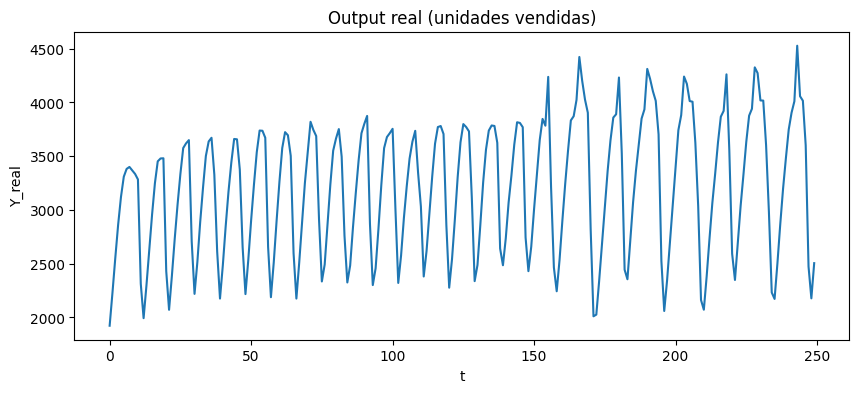

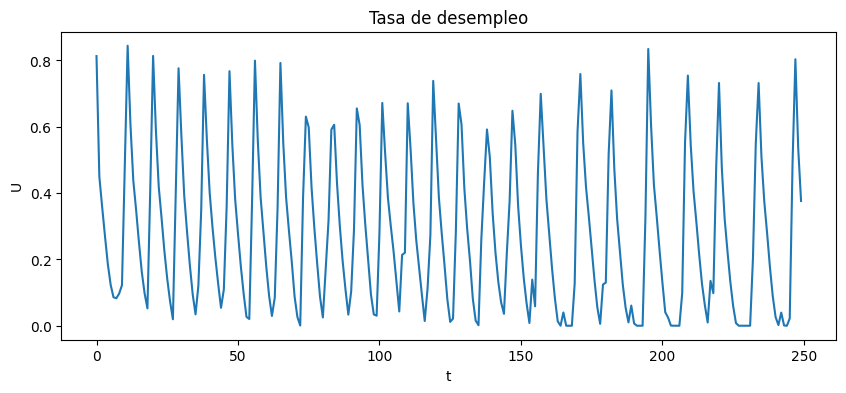

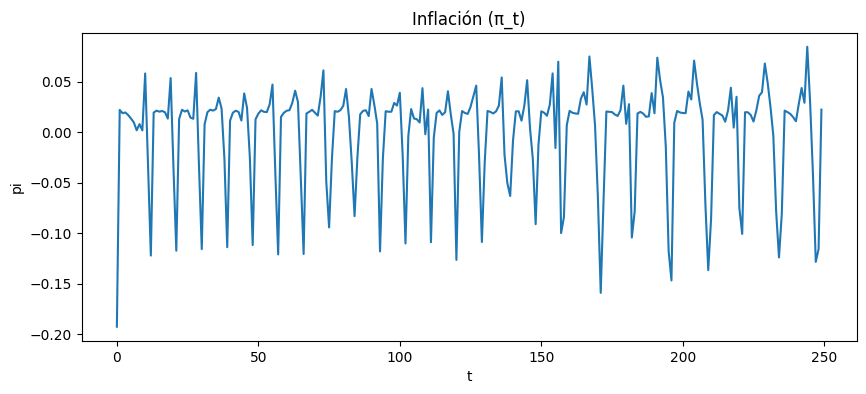

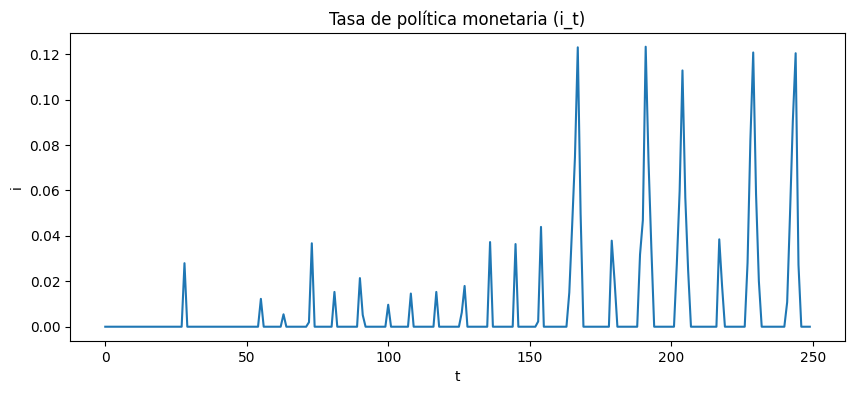

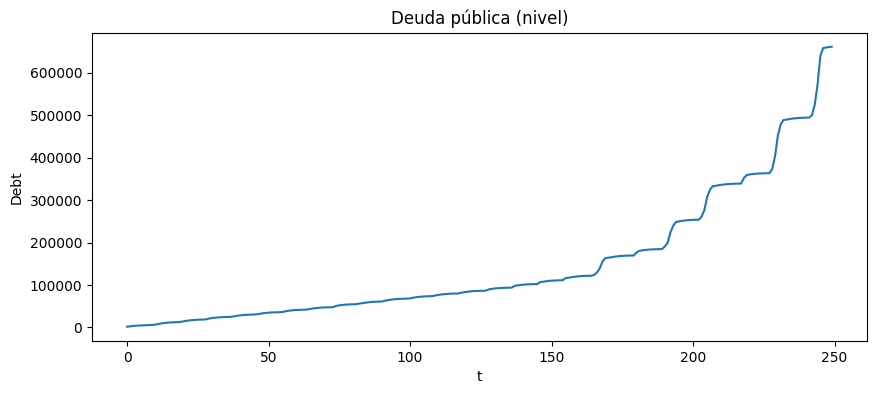

In [7]:
fig = plt.figure(figsize=(10,4))
plt.plot(df["Y_real"])
plt.title("Output real (unidades vendidas)")
plt.xlabel("t")
plt.ylabel("Y_real")
plt.show()

fig = plt.figure(figsize=(10,4))
plt.plot(df["U"])
plt.title("Tasa de desempleo")
plt.xlabel("t")
plt.ylabel("U")
plt.show()

fig = plt.figure(figsize=(10,4))
plt.plot(df["pi"])
plt.title("Inflación (π_t)")
plt.xlabel("t")
plt.ylabel("pi")
plt.show()

fig = plt.figure(figsize=(10,4))
plt.plot(df["i"])
plt.title("Tasa de política monetaria (i_t)")
plt.xlabel("t")
plt.ylabel("i")
plt.show()

fig = plt.figure(figsize=(10,4))
plt.plot(df["Debt"])
plt.title("Deuda pública (nivel)")
plt.xlabel("t")
plt.ylabel("Debt")
plt.show()
